In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle

In [2]:
df = pd.read_csv('Kinase_Substrate_Dataset_human.txt', sep='\t')
df

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#
0,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S52,447635,MILLsELsRRRIRsI,S1,,X,3597; 9721; 3398; 5199; 53085
1,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S49,450210,IEGMILLsELsRRRI,S1,,X,NaN
2,PRKCD,PKCD,Q05655,human,HDAC5,10014.0,Q9UQL6,HDAC5,human,S259,447995,FPLRkTAsEPNLKVR,NaN,,X,3443
3,PRKCD,PKCD,Q05655,human,PTPRA iso2,5786.0,P18433-2,PTPRA,human,S204,447612,PLLARSPsTNRKYPP,NaN,X,,NaN
4,PRKCD,PKCD,Q05655,human,Bcl-2,596.0,P10415,BCL2,human,S70,448395,RDPVARtsPLQtPAA,NaN,X,,2834; 2827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S855,3205935,QRVLDtssLtQsAPA,NaN,X,,NaN
13729,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S859,2024885,DtssLtQsAPAsPtN,NaN,X,,NaN
13730,ULK2,ULK2,Q8IYT8,human,SEC16A,9919.0,O15027,SEC16A,human,S846,55578720,LAQPINFsVSLSNSH,NaN,X,,NaN
13731,ULK2,ULK2,Q8IYT8,human,PIK3C3,5289.0,Q8NEB9,PIK3C3,human,S249,35483209,ESsPILTsFELVKVP,NaN,X,,13857


In [3]:
len(df)

13733

In [4]:
# show all rows 
# pd.set_option('display.max_rows', None)

In [5]:
df['length_of_sequence'] = df['SITE_+/-7_AA'].apply(lambda x: len(x))
df

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#,length_of_sequence
0,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S52,447635,MILLsELsRRRIRsI,S1,,X,3597; 9721; 3398; 5199; 53085,15
1,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S49,450210,IEGMILLsELsRRRI,S1,,X,NaN,15
2,PRKCD,PKCD,Q05655,human,HDAC5,10014.0,Q9UQL6,HDAC5,human,S259,447995,FPLRkTAsEPNLKVR,NaN,,X,3443,15
3,PRKCD,PKCD,Q05655,human,PTPRA iso2,5786.0,P18433-2,PTPRA,human,S204,447612,PLLARSPsTNRKYPP,NaN,X,,NaN,15
4,PRKCD,PKCD,Q05655,human,Bcl-2,596.0,P10415,BCL2,human,S70,448395,RDPVARtsPLQtPAA,NaN,X,,2834; 2827,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S855,3205935,QRVLDtssLtQsAPA,NaN,X,,NaN,15
13729,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S859,2024885,DtssLtQsAPAsPtN,NaN,X,,NaN,15
13730,ULK2,ULK2,Q8IYT8,human,SEC16A,9919.0,O15027,SEC16A,human,S846,55578720,LAQPINFsVSLSNSH,NaN,X,,NaN,15
13731,ULK2,ULK2,Q8IYT8,human,PIK3C3,5289.0,Q8NEB9,PIK3C3,human,S249,35483209,ESsPILTsFELVKVP,NaN,X,,13857,15


In [12]:
df = df[~df['SITE_+/-7_AA'].apply(lambda x: '_' in x)]

In [13]:
df['length_of_sequence'].value_counts()

15    13245
Name: length_of_sequence, dtype: int64

In [14]:
df

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#,length_of_sequence
0,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S52,447635,MILLsELsRRRIRsI,S1,,X,3597; 9721; 3398; 5199; 53085,15
1,EIF2AK1,HRI,Q9BQI3,human,eIF2-alpha,1965.0,P05198,EIF2S1,human,S49,450210,IEGMILLsELsRRRI,S1,,X,NaN,15
2,PRKCD,PKCD,Q05655,human,HDAC5,10014.0,Q9UQL6,HDAC5,human,S259,447995,FPLRkTAsEPNLKVR,NaN,,X,3443,15
3,PRKCD,PKCD,Q05655,human,PTPRA iso2,5786.0,P18433-2,PTPRA,human,S204,447612,PLLARSPsTNRKYPP,NaN,X,,NaN,15
4,PRKCD,PKCD,Q05655,human,Bcl-2,596.0,P10415,BCL2,human,S70,448395,RDPVARtsPLQtPAA,NaN,X,,2834; 2827,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13728,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S855,3205935,QRVLDtssLtQsAPA,NaN,X,,NaN,15
13729,ULK2,ULK2,Q8IYT8,human,Raptor,57521.0,Q8N122,RPTOR,human,S859,2024885,DtssLtQsAPAsPtN,NaN,X,,NaN,15
13730,ULK2,ULK2,Q8IYT8,human,SEC16A,9919.0,O15027,SEC16A,human,S846,55578720,LAQPINFsVSLSNSH,NaN,X,,NaN,15
13731,ULK2,ULK2,Q8IYT8,human,PIK3C3,5289.0,Q8NEB9,PIK3C3,human,S249,35483209,ESsPILTsFELVKVP,NaN,X,,13857,15


In [15]:
df[['KINASE', 'SITE_+/-7_AA']].head()

,KINASE,SITE_+/-7_AA
0,HRI,MILLsELsRRRIRsI
1,HRI,IEGMILLsELsRRRI
2,PKCD,FPLRkTAsEPNLKVR
3,PKCD,PLLARSPsTNRKYPP
4,PKCD,RDPVARtsPLQtPAA


In [16]:
df['KINASE'].nunique()

407

In [17]:
# !pip install logomaker 

In [18]:
df.groupby('KINASE')['SITE_+/-7_AA'].apply(list)

KINASE
AAK1                          [SQItsQVtGQIGWRR, LRVVDEKtKDLIVDQ]
ADCK5                                          [YQPRRRKsVKNGQAE]
ALK            [tAPGAGHyEDTILkS, GHtSNNIyEAVkySE, FGMARDIyRAs...
ALK1           [StNHSIGsTQstPCS, AssESSStNHSIGsT, HSIGsTQstPC...
ALK4                          [PkTyVDLtNEEtTDs, VDLtNEEtTDsTTSK]
                                     ...                        
p70S6K         [ETRTRTSsSCSsYsY, sGDyMPMsPKsVSAP, RsRsRtLsQss...
p70S6K iso2                   [SGRPRttsFAEsCkP, NQGGGLsssGAGEGQ]
p90RSK         [GDAPVsPssQkLKRK, EFRsRCssVtGVQRR, MsRARIGsDPL...
skMLCK                                         [NEPHESRtNsDIVEt]
smMLCK         [KRAGGANsNVFsMFE, KKRPQRAtsNVFAMF, KRPQRAtsNVF...
Name: SITE_+/-7_AA, Length: 407, dtype: object

In [19]:
kinase_list = df.groupby('KINASE')['SITE_+/-7_AA'].apply(list).to_dict()
kinase_list

{'AAK1': ['SQItsQVtGQIGWRR', 'LRVVDEKtKDLIVDQ'],
 'ADCK5': ['YQPRRRKsVKNGQAE'],
 'ALK': ['tAPGAGHyEDTILkS',
  'GHtSNNIyEAVkySE',
  'FGMARDIyRAsyyRK',
  'RRPGEktyTQRCRLF',
  'RVVACNLyPFVkTVA',
  'DPGsAAPyLktKFIC',
  'REDsARVyENVGLMQ',
  'LVKGEGLyADPYGLL',
  'AFSRVQIyHNPtANs',
  'sKRkGHEytNIKysL',
  'QVPQQPtyVQALFDF'],
 'ALK1': ['StNHSIGsTQstPCS', 'AssESSStNHSIGsT', 'HSIGsTQstPCStSS'],
 'ALK4': ['PkTyVDLtNEEtTDs', 'VDLtNEEtTDsTTSK'],
 'AMPKA1': ['skLPLTRsHNNFVAI',
  'KKVAVVRtPPKsPss',
  'GNPFDSktEQGPQVD',
  'QsIPRsAsYPCAAPR',
  'SARKRsAsADNLtLP',
  'RPLARVTsLANLIsP',
  'QHLRLSTsSGRLLyA',
  'yGAQTVRsTMNFkIG',
  'DTNsKKQsDtHLEEt',
  'IVFVRFNssHGFPVE',
  'SSLRPARsVPsIAAA',
  'GtAtPQRsGsVsNyR',
  'VkLSskLsAVsLRGI',
  'RPLSRtQsSPLPQsP',
  'LMRRStVsLLDTYQK',
  'HNYKVVVtVHGEIDP',
  'TVHQRIAsWQNLGAV',
  'GAkRVIIsAPsADAP',
  'CNLsRVDsttCLFPV',
  'VPVARKLsAREQRDC',
  'TSRIRtQsFsLQERQ',
  'LARRRKAtQVGEktP',
  'LHIRssMsGLHLVkQ',
  'EtPRARHtLDELNPQ',
  'LEStIFGsPRLASGL',
  'SSLHRtssGtsLSAM',
  'GSDRs

In [20]:
{k: len(v) for k, v in kinase_list.items()}

{'AAK1': 2,
 'ADCK5': 1,
 'ALK': 11,
 'ALK1': 3,
 'ALK4': 2,
 'AMPKA1': 159,
 'AMPKA2': 41,
 'AMPKB1': 8,
 'AMPKG2': 9,
 'ARAF': 6,
 'ASK1': 27,
 'ATM': 282,
 'ATR': 112,
 'AXL': 14,
 'Abl': 221,
 'Ack': 8,
 'Akt1': 346,
 'Akt2': 73,
 'Akt3': 16,
 'AlphaK3': 1,
 'Arg': 22,
 'AurA': 130,
 'AurB': 203,
 'AurC': 9,
 'BCR-ABL1': 15,
 'BIKE': 1,
 'BLK': 6,
 'BRAF': 17,
 'BRD4': 1,
 'BRSK1': 4,
 'BRSK1 iso2': 6,
 'BRSK2': 6,
 'BUB1': 28,
 'BVR': 3,
 'Bcr': 3,
 'Brk': 15,
 'Btk': 20,
 'CAMK1A': 16,
 'CAMK1B': 4,
 'CAMK1G': 1,
 'CAMK2A': 142,
 'CAMK2B': 9,
 'CAMK2D': 16,
 'CAMK2D iso8': 1,
 'CAMK2G': 7,
 'CAMK4': 11,
 'CAMKK1': 7,
 'CAMKK2': 6,
 'CASK': 5,
 'CDC7': 43,
 'CDK1': 648,
 'CDK10': 2,
 'CDK11A': 3,
 'CDK11A iso10': 1,
 'CDK11B': 2,
 'CDK12': 7,
 'CDK13': 3,
 'CDK14': 10,
 'CDK15': 1,
 'CDK16': 3,
 'CDK18': 3,
 'CDK19': 6,
 'CDK2': 415,
 'CDK20': 2,
 'CDK3': 16,
 'CDK4': 75,
 'CDK5': 157,
 'CDK6': 48,
 'CDK7': 47,
 'CDK8': 14,
 'CDK9': 49,
 'CDKL2': 1,
 'CDKL5': 24,
 'CK1A': 132,
 'C

In [21]:
need_family = ["ATR", "WNK3", "DNAPK", "NEK11", "PRP4","PKCD"]

In [22]:
{k: len(v) for k, v in kinase_list.items() if k in need_family}

{'ATR': 112, 'DNAPK': 131, 'NEK11': 4, 'PKCD': 132, 'PRP4': 1, 'WNK3': 4}

In [23]:
df.columns

Index(['GENE', 'KINASE', 'KIN_ACC_ID', 'KIN_ORGANISM', 'SUBSTRATE',
       'SUB_GENE_ID', 'SUB_ACC_ID', 'SUB_GENE', 'SUB_ORGANISM', 'SUB_MOD_RSD',
       'SITE_GRP_ID', 'SITE_+/-7_AA', 'DOMAIN', 'IN_VIVO_RXN', 'IN_VITRO_RXN',
       'CST_CAT#', 'length_of_sequence'],
      dtype='object')

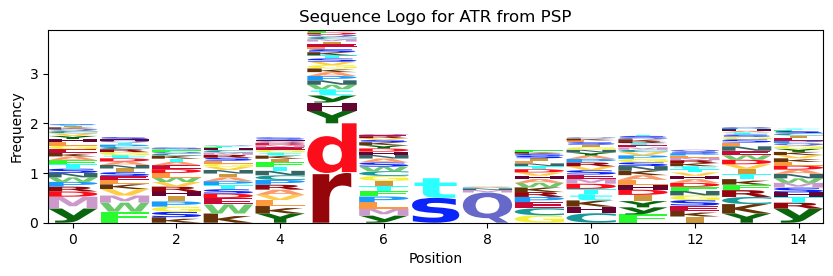

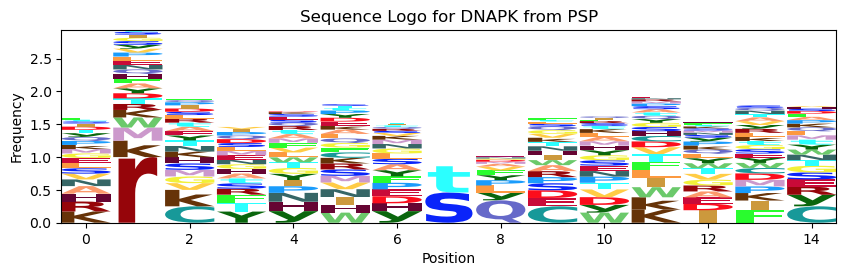

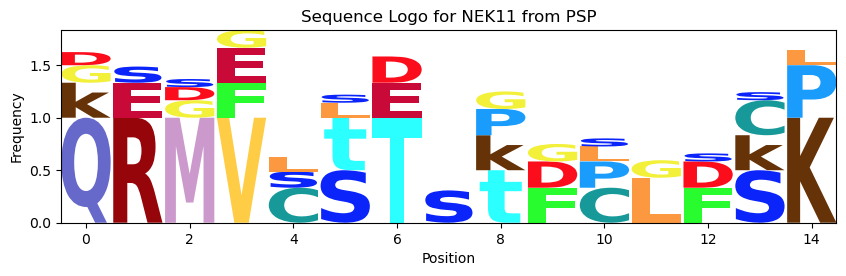

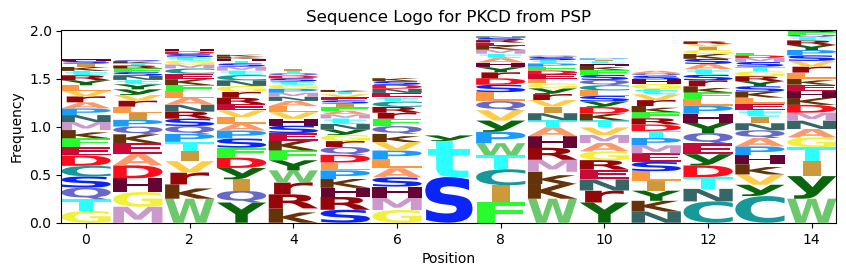

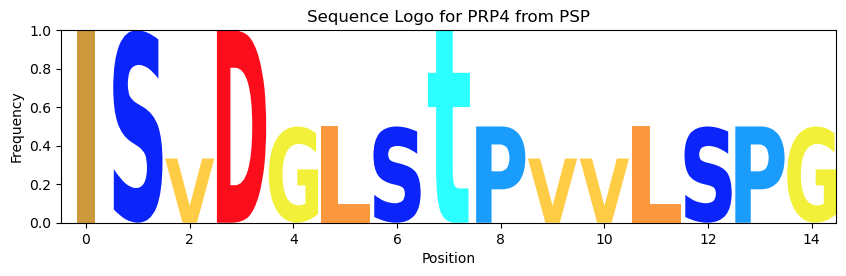

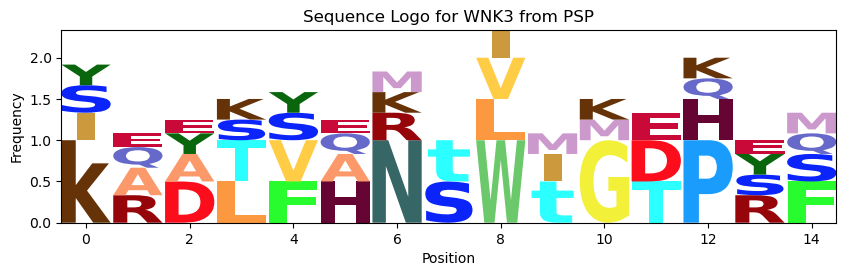

In [25]:
import logomaker
from collections import Counter

# # Group by 'KINASE_psp' and combine all sequences into a list
kinase_sequences = df.groupby('KINASE')['SITE_+/-7_AA'].apply(list)

# # Initialize an empty dictionary to store the Logos for each kinase
kinase_logos = {}

# # For each kinase, create a position frequency matrix and then a sequence logo
for kinase, sequences in kinase_sequences.items():
    if kinase not in need_family:
        continue
#     # Combine sequences into a single string for each position
    aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
    
#     # Create a DataFrame where each row corresponds to one position
    position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
    
#     # Normalize the counts to get frequencies
    position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
    
#     # Create the sequence logo
    logo = logomaker.Logo(position_freq_matrix, color_scheme='skylign_protein', stack_order='small_on_top')
    
#     # Set title and axis labels
    logo.ax.set_title(f'Sequence Logo for {kinase} from PSP')
    logo.ax.set_xlabel('Position')
    logo.ax.set_ylabel('Frequency')
    
#     # Store the logo in the dictionary
    kinase_logos[kinase] = logo
# Display the logo
plt.show()
    
